In [2]:
!python --version

zsh:1: command not found: python


In [3]:
pip install --ignore-installed gapstatistics

  Obtaining dependency information for gapstatistics from https://files.pythonhosted.org/packages/2b/a6/9f99b9d9426ee4eb4ee53f1f76c3e66ae04bb08b1fcd18d3abbb4e196875/gapstatistics-0.1.5-py2.py3-none-any.whl.metadata
  Using cached gapstatistics-0.1.5-py2.py3-none-any.whl.metadata (5.6 kB)
Using cached gapstatistics-0.1.5-py2.py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install gap-stat
!pip install git+https://github.com/milesgranger/gap_statistic.git

zsh:1: command not found: pip


In [6]:
import site
print(site.getsitepackages())

['/Users/mmueller/anaconda3/lib/python3.11/site-packages']


Finished fitting KMeans with 1 clusters
Finished fitting KMeans with 2 clusters
Finished fitting KMeans with 3 clusters
Finished fitting KMeans with 4 clusters
Finished fitting KMeans with 5 clusters
Finished fitting KMeans with 6 clusters
Finished fitting KMeans with 7 clusters
Finished fitting KMeans with 8 clusters
Finished fitting KMeans with 9 clusters
Finished fitting KMeans with 10 clusters


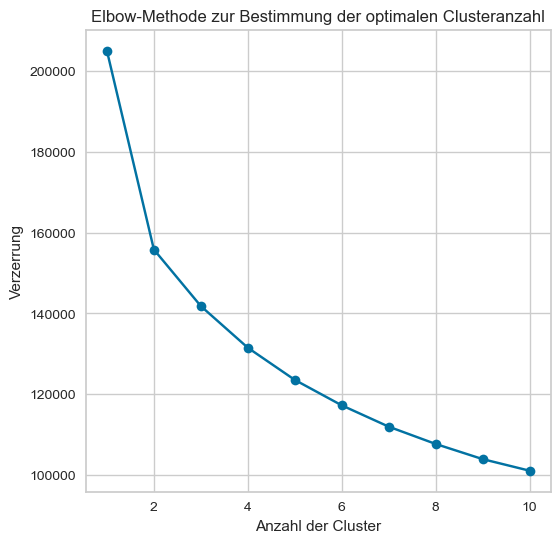

Für n_clusters = 2, ist der Silhouettenkoeffizient 0.3111853628680454)
Für n_clusters = 3, ist der Silhouettenkoeffizient 0.14353491808940272)
Für n_clusters = 4, ist der Silhouettenkoeffizient 0.11655250264300267)
Für n_clusters = 5, ist der Silhouettenkoeffizient 0.13516070242341882)
Für n_clusters = 6, ist der Silhouettenkoeffizient 0.1184078891446669)
Für n_clusters = 7, ist der Silhouettenkoeffizient 0.11962915008168462)
Für n_clusters = 8, ist der Silhouettenkoeffizient 0.11850767915103094)
Für n_clusters = 9, ist der Silhouettenkoeffizient 0.11470005865836966)
Shape von df_filtered: (15768, 61)
Shape von preds: (15768,)
Cluster 0: 2429 Datenpunkte
Cluster 1: 2081 Datenpunkte
Cluster 2: 2242 Datenpunkte
Cluster 3: 814 Datenpunkte
Cluster 4: 1631 Datenpunkte
Cluster 5: 1138 Datenpunkte
Cluster 6: 2546 Datenpunkte
Cluster 7: 613 Datenpunkte
Cluster 8: 2274 Datenpunkte


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer


df = pd.read_csv('short4python_clustering.csv')


numerical_variables = ['BPM', 'LF', 'LFnu',  'HF', 'pNN20', 'pNN50', 'MAD', 'TP', 'BR', 'RMSSD']
  
covariate_variables = ['z_age', 'sex', 'z_BMI']
all_variables = numerical_variables + covariate_variables

# Imputation 
num_imputer = SimpleImputer(strategy='mean')
df[all_variables] = num_imputer.fit_transform(df[all_variables])

#  Lithium = 1 oder Antidepressiva = 1 raus
df_filtered = df[(df['lithium'] != 1) & (df['antidepress'] != 1)]


X = df_filtered[all_variables]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20, random_state=100)  # Änderungen hier
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
    print(f"Finished fitting KMeans with {i} clusters")

# Elbow-Diagramm
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode to detect optimal Cluster Size')
plt.show()

range_n_clusters = list(range(2, 10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=20, random_state=100)  # Änderungen hier
    preds = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"For n_clusters = {n_clusters}, the Silhouetten coefficient is {score})")


print(f"Shape of df_filtered: {df_filtered.shape}")
print(f"Shape of preds: {preds.shape}")

# Berechnung der Clustergrößen
unique, counts = np.unique(preds, return_counts=True)


for cluster, size in zip(unique, counts):
    print(f"Cluster {cluster}: {size} Datapoints")


  

zsh:1: command not found: pip


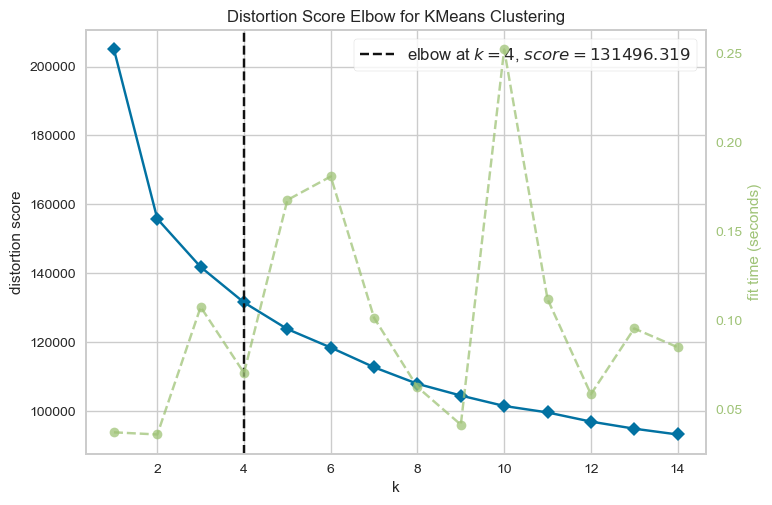

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Alternative zu GAP-Statistik
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


model = KMeans(random_state=42, n_init='auto') 
visualizer = KElbowVisualizer(model, k=(1, 15)) 

visualizer.fit(X_scaled) 
visualizer.show() 


In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


Shape von df_filtered: (15768, 61)
Shape von preds: (15768,)


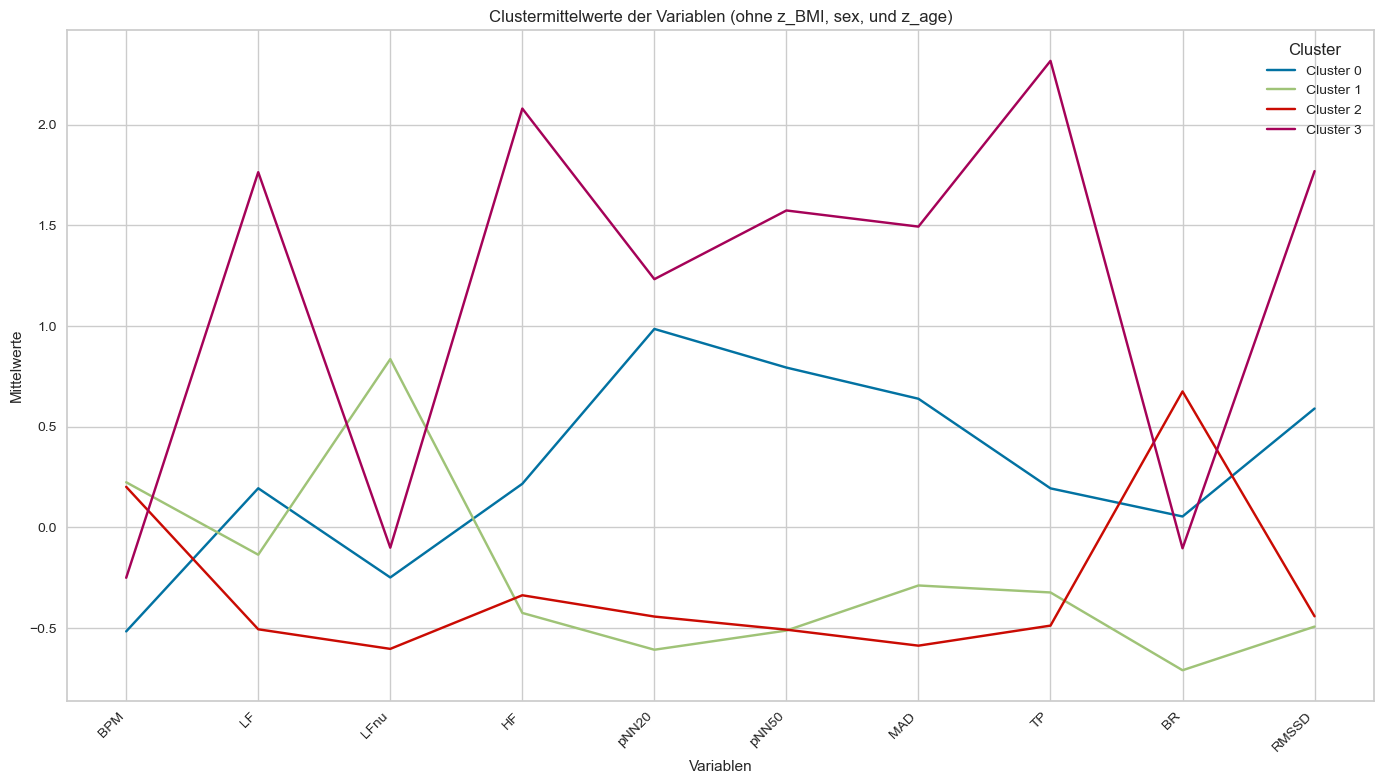

Cluster 0: 3731 Datenpunkte
Cluster 1: 5158 Datenpunkte
Cluster 2: 5339 Datenpunkte
Cluster 3: 1540 Datenpunkte


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


df = pd.read_csv('short4python_clustering.csv')

# Imputation via "mean"
numerical_variables = ['BPM', 'LF', 'LFnu',  'HF', 'pNN20', 'pNN50', 'MAD', 'TP', 'BR', 'RMSSD']
covariate_variables = ['z_age', 'sex', 'z_BMI']
all_variables = numerical_variables + covariate_variables  # Alle Variablen für das Clustering
num_imputer = SimpleImputer(strategy='mean')
df[all_variables] = num_imputer.fit_transform(df[all_variables])

df_filtered = df[(df['lithium'] != 1) & (df['antidepress'] != 1)].copy()

print("Shape of df_filtered:", df_filtered.shape)


model_variables = all_variables  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[model_variables])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
preds = kmeans.fit_predict(X_scaled)

print("Shape of preds:", preds.shape)

df_filtered.loc[:, 'cluster'] = preds

cluster_means = df_filtered.groupby('cluster')[model_variables].mean()

# Reihenfolge der Variablen für die Visualisierung
visualization_variables = [var for var in model_variables if var not in ['z_BMI', 'sex', 'z_age']]
cluster_means_ordered_vis = cluster_means[visualization_variables]

plt.figure(figsize=(14, 8))
for cluster in cluster_means_ordered_vis.index:
    plt.plot(cluster_means_ordered_vis.columns, cluster_means_ordered_vis.loc[cluster], label=f'Cluster {cluster}')
plt.xticks(rotation=45, ha='right')
plt.title('Cluster mean of variables (without z_BMI, sex, and z_age)')
plt.xlabel('Variables')
plt.ylabel('Means')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


cluster_sizes = df_filtered['cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} Datapoints")

df_filtered[['eid', 'cluster']].to_csv('output_kmeans_4cluster_filtered_test.csv', index=False)


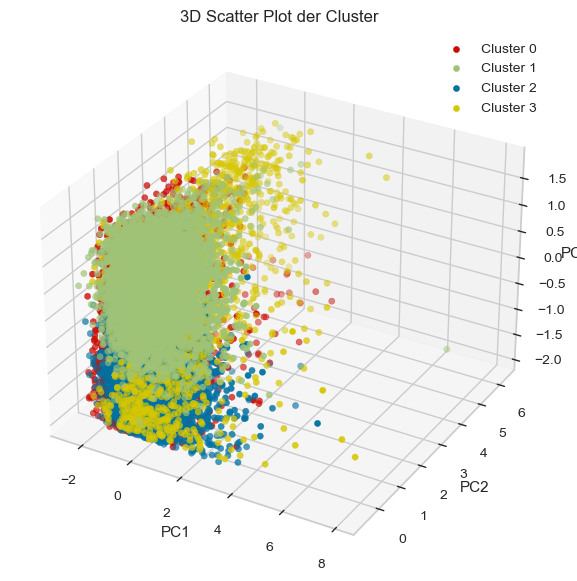

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for cluster in np.unique(preds):
    ax.scatter(X_scaled[preds == cluster, 0], X_scaled[preds == cluster, 1], X_scaled[preds == cluster, 2], label=f'Cluster {cluster}', c=colors[cluster])

ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

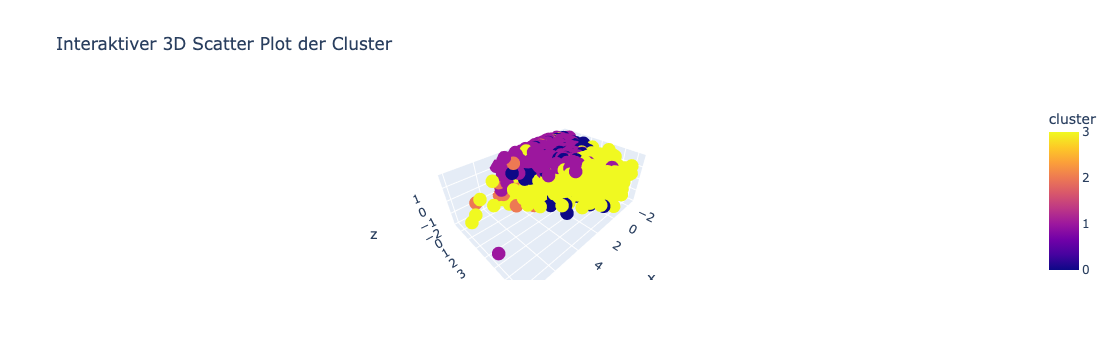

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_filtered, x=X_scaled[:, 0], y=X_scaled[:, 1], z=X_scaled[:, 2],
                    color='cluster', title='Interactive 3D Scatter Plot of Clusters')
fig.show()

In [13]:

cluster_means = df_filtered.groupby('cluster')[numerical_variables].mean()


means_df = pd.DataFrame(cluster_means).reset_index()


means_df.columns = ['Cluster'] + ['Mean of ' + var for var in numerical_variables]

means_df

Cluster  Mean of BPM  Mean of LF  Mean of LFnu  Mean of HF  Mean of pNN20  \
0        0    -0.516416    0.194322     -0.248568    0.216579       0.985499   
1        1     0.224135   -0.135587      0.835714   -0.424745      -0.607455   
2        2     0.201419   -0.505965     -0.603174   -0.336982      -0.442757   
3        3    -0.250104    1.763966     -0.100749    2.079833       1.232622   

   Mean of pNN50  Mean of MAD  Mean of TP  Mean of BR  Mean of RMSSD  
0       0.793664     0.638820    0.193829    0.054270       0.590256  
1      -0.512293    -0.288368   -0.323067   -0.709273      -0.492602  
2      -0.507785    -0.587237   -0.487688    0.675204      -0.441554  
3       1.573757     1.493628    2.316628   -0.103720       1.769292

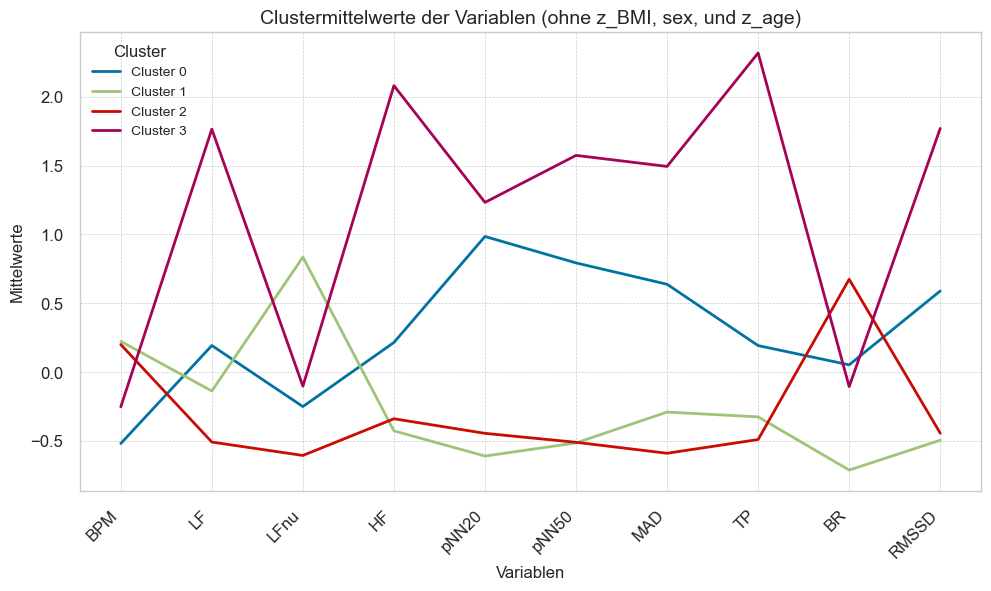

In [ ]:
 # Für publikationstaugliche Grafik!!!

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns  

sns.set_style("whitegrid")
sns.set_context("paper") 

plt.figure(figsize=(10, 6)) 
for cluster in cluster_means_ordered_vis.index:
    plt.plot(cluster_means_ordered_vis.columns, cluster_means_ordered_vis.loc[cluster], label=f'Cluster {cluster}', linewidth=2) 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Clustermeans of variables (without z_BMI, sex, and z_age)', fontsize=14) 
plt.xlabel('Variablen', fontsize=12)
plt.ylabel('Mittelwerte', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize='12')  
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.tight_layout()  
plt.show()

